# Hodgkin-Huxley Model: Membrane Dynamics

This notebook explores the dynamic behavior of the membrane potential in response to various stimuli.

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt
from src.model import HodgkinHuxleyModel
from src.visualization import plot_membrane_potential, plot_gate_variables

plt.style.use('seaborn-darkgrid')

/var/folders/j5/9drs1nyn0c37q_29h5sv9xdh0000gn/T/ipykernel_65096/721643604.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## 1. Single Action Potential

Let's examine the response to a brief current pulse.

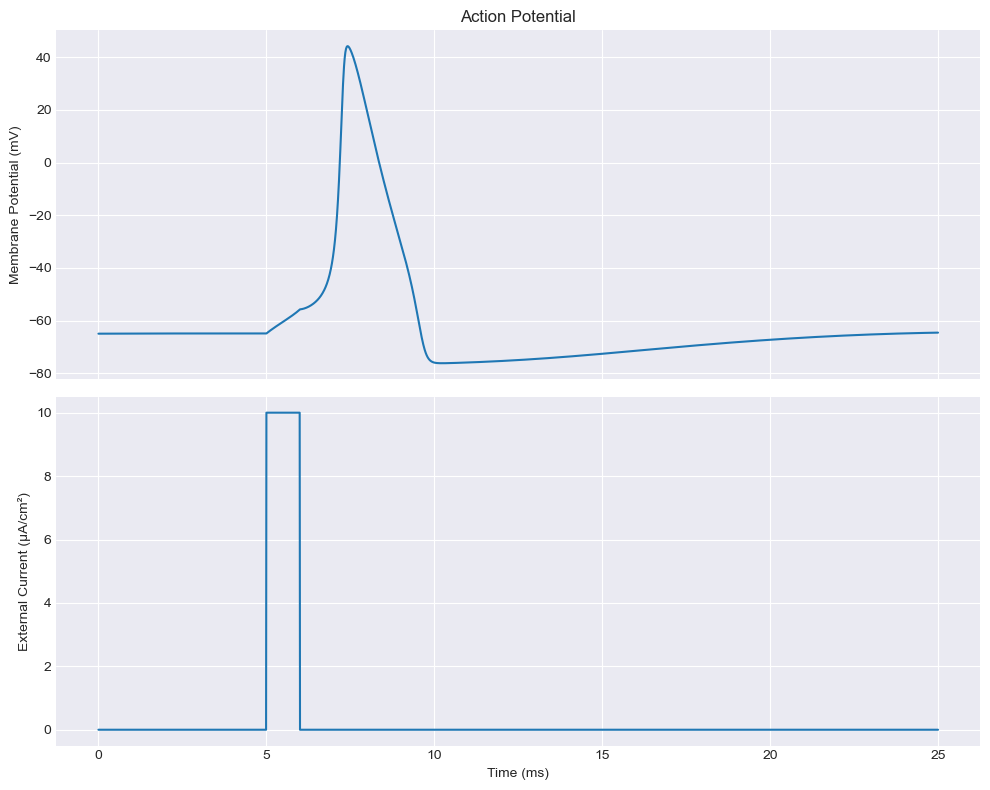

/Users/1amaj/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8314 (\N{SUPERSCRIPT PLUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


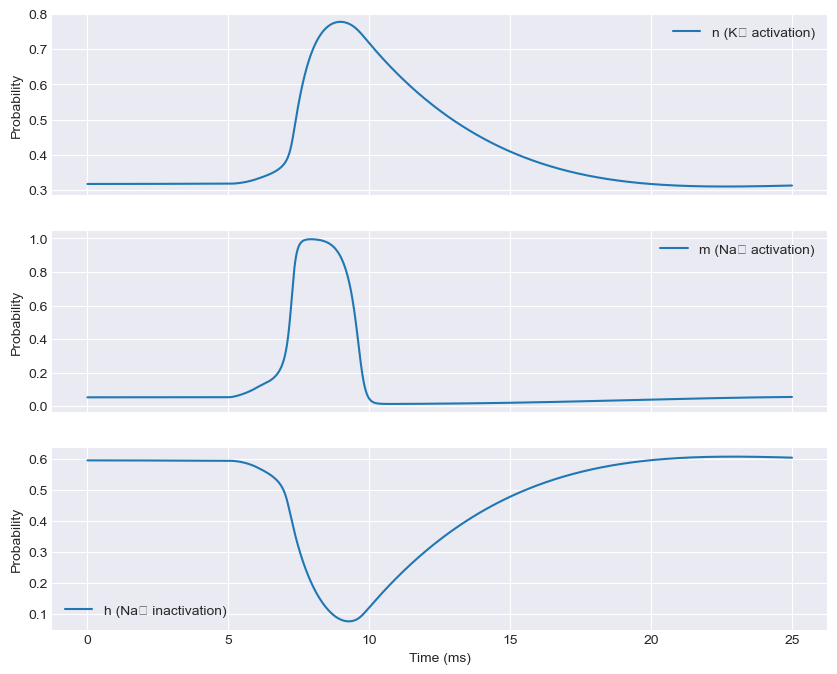

In [ ]:
def pulse_current(t, amplitude=10, start=5, duration=1):
    """Generate a current pulse."""
    return amplitude if start <= t < (start + duration) else 0

model = HodgkinHuxleyModel()

t_span = [0, 25]  # 25ms simulation
t, V, n, m, h = model.simulate(t_span, I_ext_func=lambda t: pulse_current(t))

I_ext = np.array([pulse_current(t_i) for t_i in t])

fig1 = plot_membrane_potential(t, V, "Action Potential", I_ext)
plt.show()

fig2 = plot_gate_variables(t, n, m, h)
plt.show()

## 2. Threshold Behavior

Now let's explore how the membrane responds to different stimulus intensities.

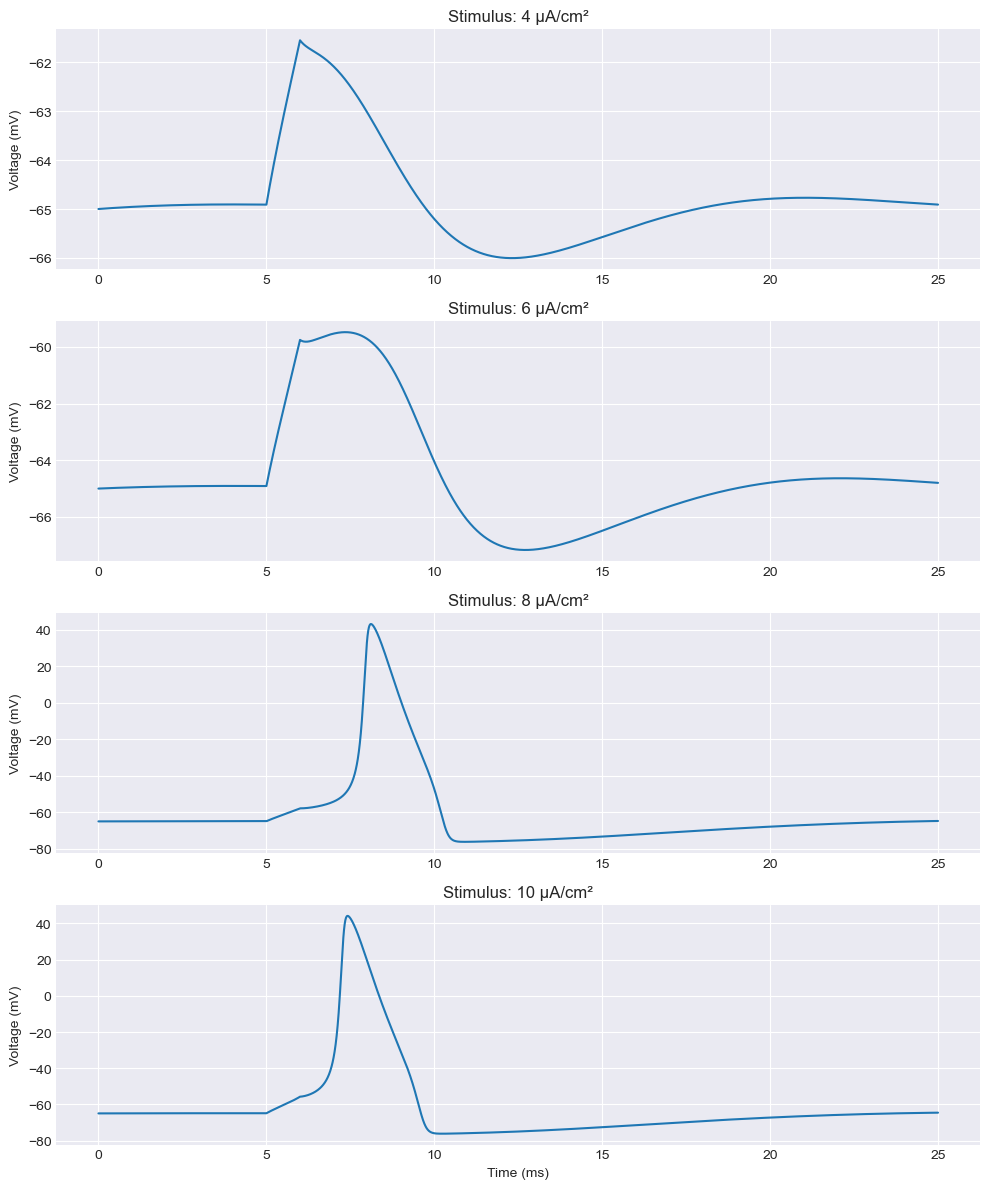

In [ ]:
amplitudes = [4, 6, 8, 10]
t_span = [0, 25]

fig, axes = plt.subplots(len(amplitudes), 1, figsize=(10, 3*len(amplitudes)))

for i, amp in enumerate(amplitudes):
    model.reset_state()
    t, V, n, m, h = model.simulate(t_span, I_ext_func=lambda t: pulse_current(t, amplitude=amp))
    
    axes[i].plot(t, V)
    axes[i].set_title(f'Stimulus: {amp} μA/cm²')
    axes[i].set_ylabel('Voltage (mV)')
    axes[i].grid(True)

axes[-1].set_xlabel('Time (ms)')
plt.tight_layout()
plt.show()